In [2]:
import numpy as np 
import pandas as pd 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from matplotlib.pylab import rcParams 
from statsmodels.tsa.stattools import acf, pacf

# 1

In [3]:
cesp = np.loadtxt("/Users/zed/VSCode/Stats-Alg/HW/统计软件_HW8/m-ew6299.txt")
print("adf-test p-value:",adfuller(cesp)[1])

adf-test p-value: 1.0923198793802618e-29


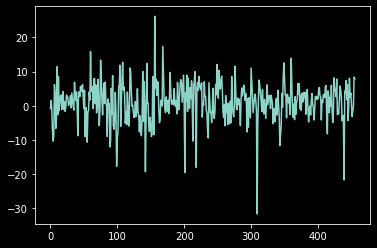

In [4]:
plt.plot(cesp)

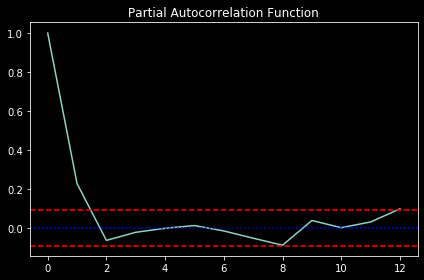

In [5]:
def PACFplot(ts,lag=12):
    lag_acf = acf(ts, nlags=lag)
    lag_pacf = pacf(ts, nlags=lag, method='ols')
    plt.vlines(range(lag),[0],lag_pacf,linewidth=5.0)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle=':',color='blue')
    plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='red')
    plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='red')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()

PACFplot(cesp)

## According to the pacf,choose p=1 as pacf cut off tail after p=1.

In [6]:
for i in range(1,13):
    model_fit = ARMA(cesp,order=(i+1,0)).fit()
    print("p=",str(i),"\t AIC:",model_fit.aic,"\t BIC:",model_fit.bic)

p= 1 	 AIC: 2846.352144824958 	 BIC: 2862.8421160630155
p= 2 	 AIC: 2848.1172647708054 	 BIC: 2868.729728818377
p= 3 	 AIC: 2850.1151377095402 	 BIC: 2874.8500945666265
p= 4 	 AIC: 2852.0528980702834 	 BIC: 2880.910347736884
p= 5 	 AIC: 2853.9366529607346 	 BIC: 2886.9165954368495
p= 6 	 AIC: 2854.64795598577 	 BIC: 2891.750391271399
p= 7 	 AIC: 2853.039812319398 	 BIC: 2894.264740414542
p= 8 	 AIC: 2854.3945066262127 	 BIC: 2899.7419275308707
p= 9 	 AIC: 2856.394253386787 	 BIC: 2905.8641671009595
p= 10 	 AIC: 2857.976542337176 	 BIC: 2911.5689488608627
p= 11 	 AIC: 2855.6470385208177 	 BIC: 2913.3619378540193
p= 12 	 AIC: 2856.308995234945 	 BIC: 2918.146387377661


## when p = 1,AIC and BIC are minimized

# By conclusion,AR(1) is the most suitable model.As the pacf funtion cut off tail after p=1,aic and bic are minimum when p=1 as well.

# 2

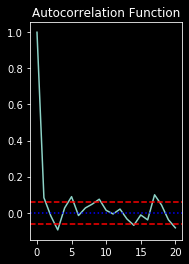

In [7]:
sp500 = np.loadtxt("/Users/zed/VSCode/Stats-Alg/HW/统计软件_HW8/m-ibm3dx2608.txt",skiprows=1)
sp500 = pd.DataFrame(sp500)
sprtn = sp500[4]
logrtn = np.log(sprtn+1)
def ACFplot(ts,lag=20):
    lag_acf = acf(ts, nlags=lag)
    lag_pacf = pacf(ts, nlags=lag, method='ols')
    #画 ACF: 
    plt.subplot(121) 
    plt.vlines(range(lag),[0],lag_acf,linewidth=5.0)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle=':',color='blue')
    plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='red')
    plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='red')
    plt.title('Autocorrelation Function')

ACFplot(logrtn)



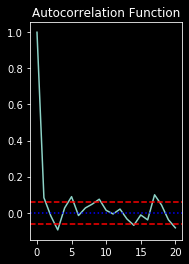

In [8]:
ACFplot(logrtn)

In [9]:
from statsmodels.stats.diagnostic import acorr_ljungbox
test1=acorr_ljungbox(sprtn,lags=[6,12],boxpierce=True)
test2=acorr_ljungbox(logrtn,lags=[6,12],boxpierce=True)
print(test1)
print(test2)

(array([26.84019113, 37.82614387]), array([0.00015514, 0.00016394]), array([26.70683368, 37.57398959]), array([0.00016431, 0.00018022]))
(array([25.3066099, 34.648771 ]), array([0.00029958, 0.00053256]), array([25.17675999, 34.41819186]), array([0.00031666, 0.00057933]))


## It's not white noise as there are points in the acf graph that fall outside the 95% confidence interval.And the residual is not norm,as the p-value<0.05

In [10]:
def autocorrelation(x,lags):#计算lags阶以内的自相关系数，返回lags个值，分别计算序列均值，标准差
	n = len(x)
	x = np.array(x)
	result = [np.correlate(x[i:]-x[i:].mean(),x[:n-i]-x[:n-i].mean())[0]\
		/(x[i:].std()*x[:n-i].std()*(n-i)) \
		for i in range(1,lags+1)]
	return result
autocorrelation(sprtn,20)

[0.08849157045826275,
 -0.02422837832530485,
 -0.10691928143912417,
 0.019482246212478373,
 0.07540908902239352,
 -0.03458876396171312,
 0.014373582182275742,
 0.05092279038869542,
 0.08931415726034934,
 0.010723590976824566,
 -0.015195404857342441,
 0.005938705761822201,
 -0.04050488230627213,
 -0.07697892788335503,
 -0.01986575895548674,
 -0.045135327911703,
 0.08776129655573855,
 0.04478122606522143,
 -0.04537570249690173,
 -0.08447186703624633]

## no strong correlationship

# 3

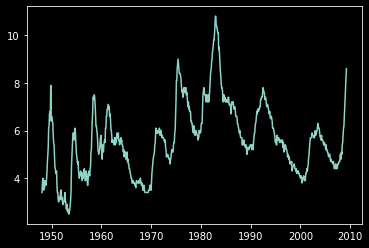

In [14]:
data = pd.read_table("/Users/zed/VSCode/Stats-Alg/HW/统计软件_HW8/m-unrate.txt",sep = "\s+")
Rate=data['Rate']
data1=pd.date_range(start='1948-01', freq='M',periods=len(Rate))
RATE=pd.DataFrame(Rate,columns=['Rate'])
RATE['date']=data1
RATE=pd.Series(np.array(RATE['Rate']),index=RATE['date'])
plt.plot(RATE)


In [26]:
def ACF_PACF(ts,lag=25):
    lag_acf = acf(ts, nlags=lag)
    lag_pacf = pacf(ts, nlags=lag, method='ols')
    # 画ACF: 
    plt.subplot(121) 
    plt.vlines(range(lag),[0],lag_acf,linewidth=5.0)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle=':',color='blue')
    plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='red')
    plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='red')
    plt.title('Autocorrelation Function')
    # 画PACF:
    plt.subplot(122)
    plt.vlines(range(lag),[0],lag_pacf,linewidth=5.0)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle=':',color='blue')
    plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='red')
    plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='red')
    plt.title('Partial Autocorrelation Function')


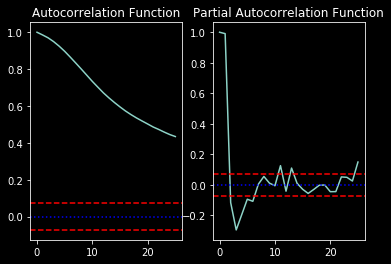

In [28]:
ACF_PACF(Rate)

## According to the acf,pacf figure,the acf is trailing,and the pacf is cutting off when p=6.

2009-04-30    8.800171
2009-05-31    9.007487
2009-06-30    9.143334
2009-07-31    9.255678
Freq: M, dtype: float64


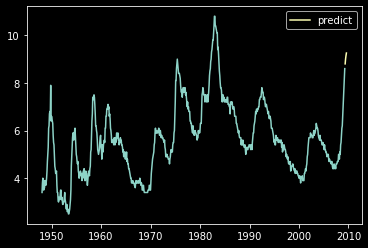

In [52]:
time=pd.date_range('1948-01','2009-04',freq='M')
Rate.index=time
model=ARMA(Rate,(6,0)).fit()
predict=model.predict('2009-04','2009-07')
print(predict)
plt.plot(RATE['1948-01':])
plt.plot(predict,label='predict')
plt.legend()

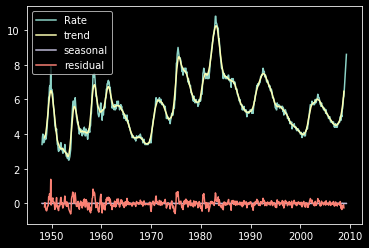

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
timeline=pd.date_range('1948-01','2009-04',freq='M')
Rate.index=timeline
s=seasonal_decompose(Rate)
plt.plot(Rate,label='Rate')
plt.plot(s.trend,label='trend')
plt.plot(s.seasonal,label='seasonal')
plt.plot(s.resid,label='residual')
plt.legend(loc=2)

There is no seasonal economic cycle.